In [121]:
import numpy as np
from numpy import random
random.seed(12345)
from sklearn import metrics
from sklearn.metrics import r2_score
import sklearn
from sklearn.linear_model import RidgeCV
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm # SVM
%config InlineBackend.figure_format = 'png'
sns.set()

from scipy.stats import chi2_contingency
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [122]:
data=pd.read_csv("StudentPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [124]:
data.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [125]:
#Renaming columns
columns1={'gender':'gender','race/ethnicity':'race','parental level of education':'parent_ed_level','lunch':'lunch_type','test preparation course':'test_prep','math score':'math','reading score':'reading','writing score':'writing'}
data.rename(columns=columns1,inplace=True)
data.head()

,gender,race,parent_ed_level,lunch_type,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [126]:
#Data wrangling
data['total']=data['math']+data['reading']+data['writing']

#replacing 'some high school' with 'high school'
data['parent_ed_level']=data['parent_ed_level'].replace(['some high school'],'high school')
data['parent_ed_level'].unique()

data['lunch_type']=data['lunch_type'].replace(['free/reduced'],'reduced')
data.head()

,gender,race,parent_ed_level,lunch_type,test_prep,math,reading,writing,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


array([[<Axes: title={'center': 'math'}>,
        <Axes: title={'center': 'reading'}>],
       [<Axes: title={'center': 'writing'}>,
        <Axes: title={'center': 'total'}>]], dtype=object)

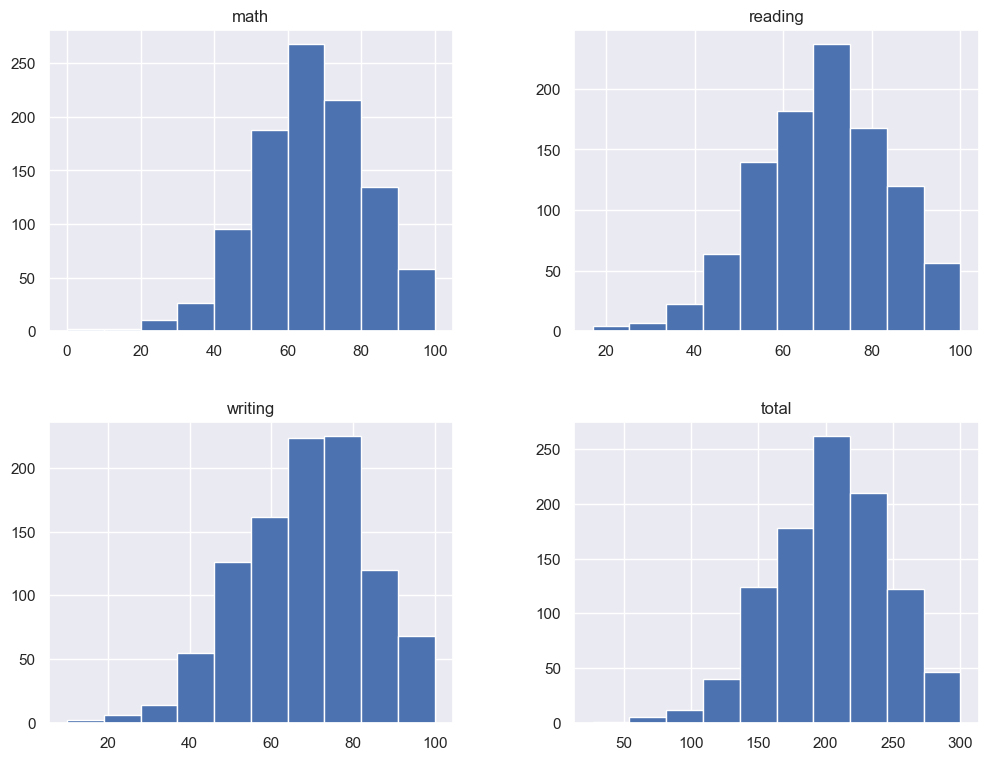

In [127]:
#Univariate analysis
data[['math','reading','writing','total']].hist(figsize=(12,9))

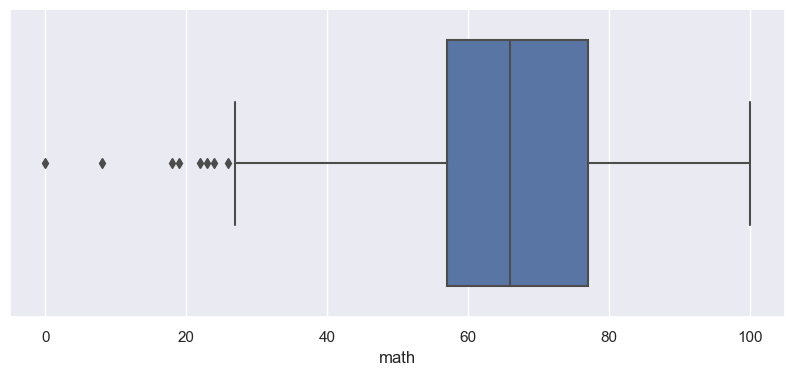

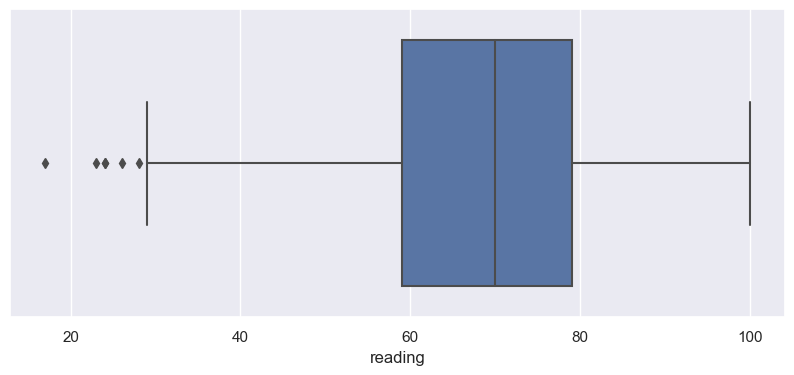

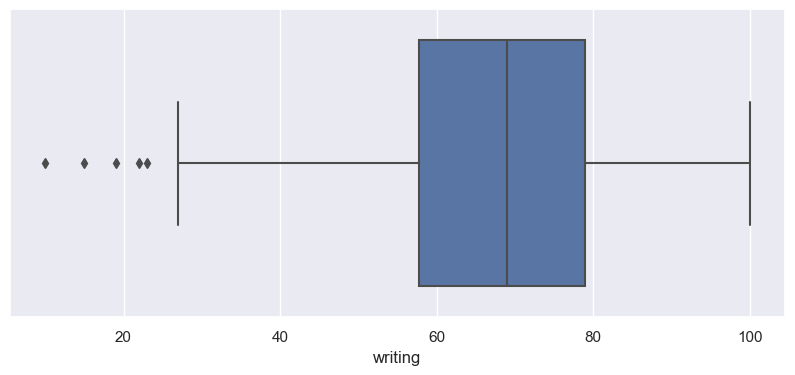

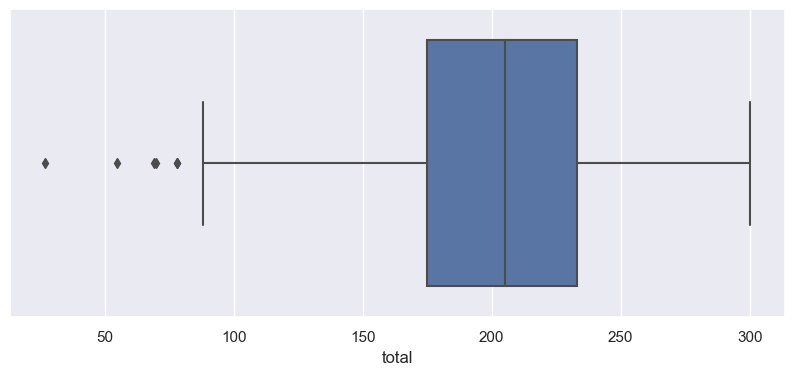

In [128]:
#function to create a boxplot
def boxplot(column,dataf):
    plt.figure(figsize=(10,4))
    sns.boxplot(x=column,data=dataf)
nums=['math','reading','writing','total']
for i in nums:
    boxplot(i,data)

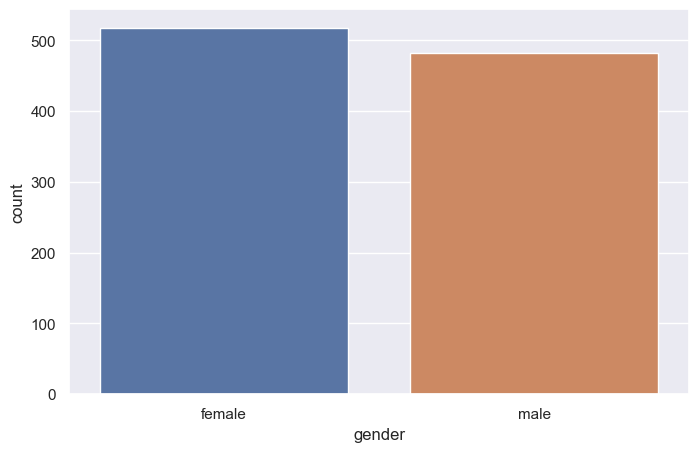

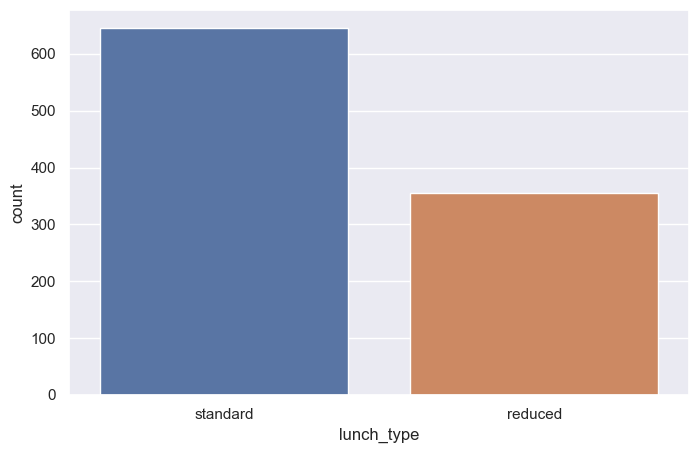

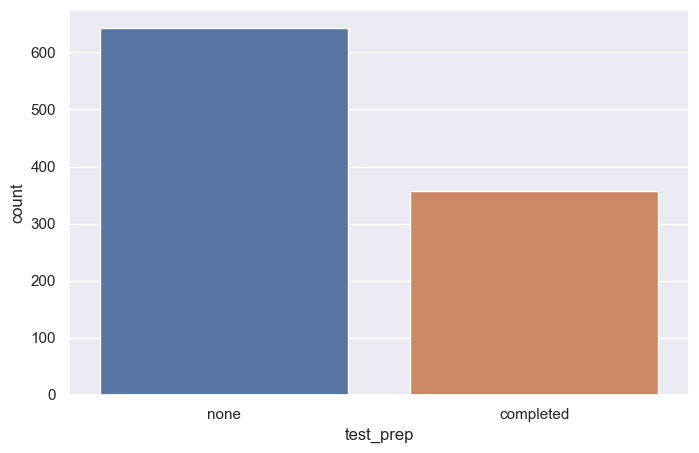

In [129]:
#Interpreting boxplots
cat_list=['gender','lunch_type','test_prep']
for col in cat_list:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=data)

<Axes: xlabel='parent_ed_level', ylabel='count'>

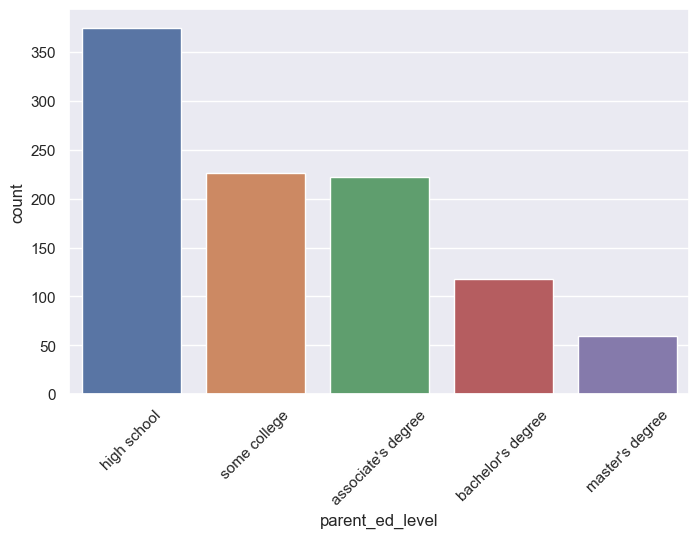

In [130]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
sns.countplot(x='parent_ed_level',data=data,order=['high school','some college',"associate's degree","bachelor's degree","master's degree"])

<Axes: xlabel='race', ylabel='count'>

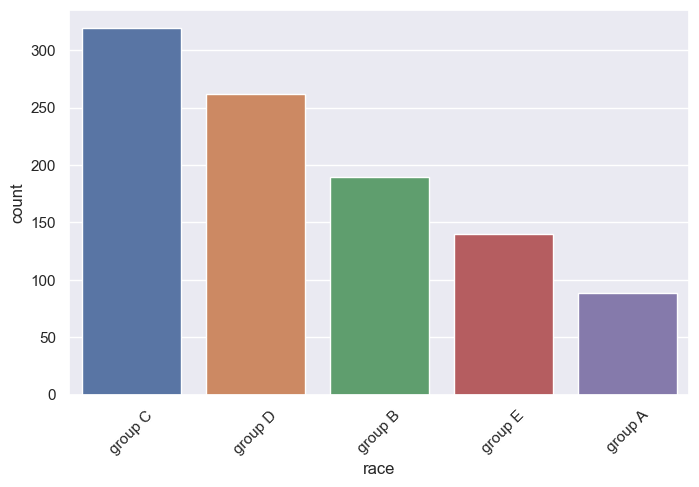

In [131]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
sns.countplot(x='race',data=data,order=['group C','group D',"group B","group E","group A"])

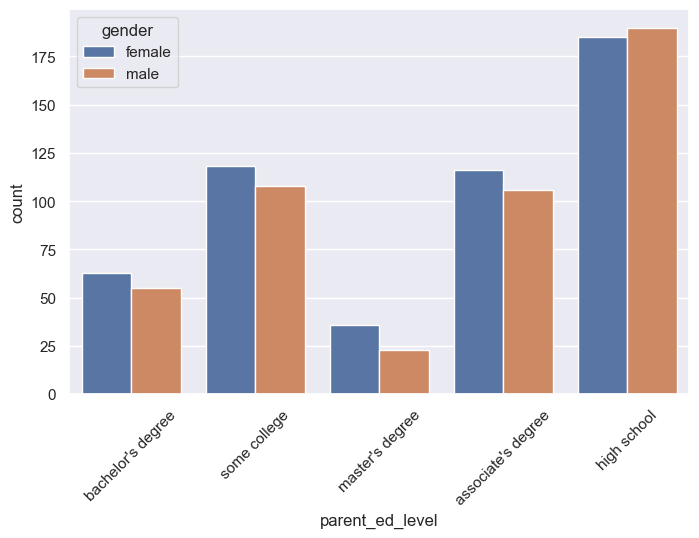

In [132]:
#Multivariate analysis
def hue(a,b):
    plt.figure(figsize=(8,5))
    if a=='parent_ed_level':
        plt.xticks(rotation=45)
    sns.countplot(x=a,data=data,hue=b)
hue('parent_ed_level','gender')

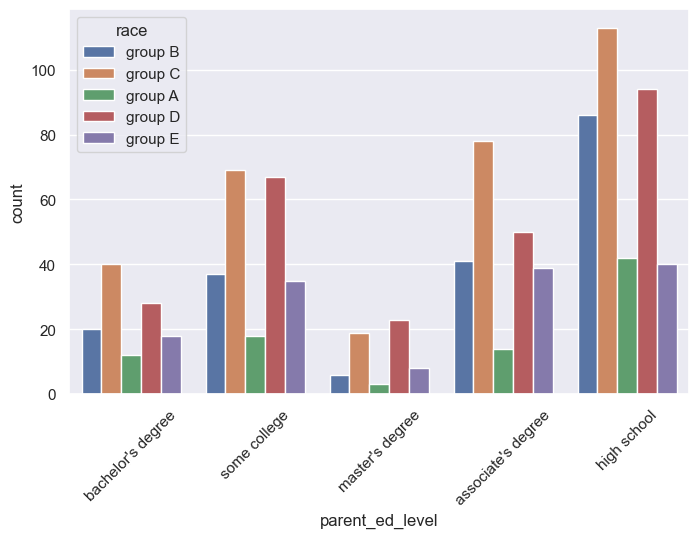

In [133]:
hue('parent_ed_level','race')

<Axes: >

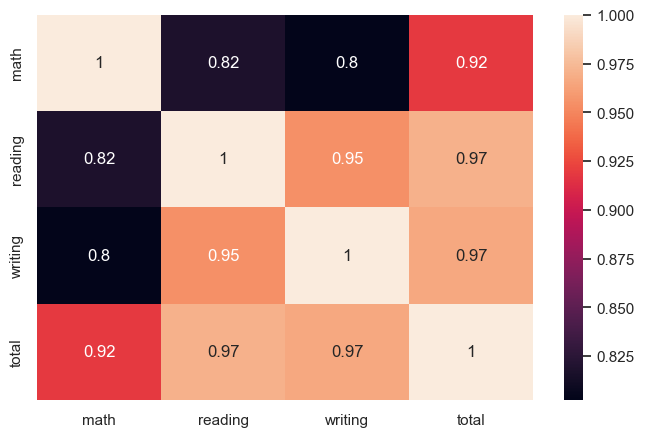

In [134]:
corr_matrix=data[nums].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True)

In [135]:
data.drop(['total'],axis=1,inplace=True)
new_data=data.copy()
new_data.drop(['writing'],inplace=True,axis=1)
new_data.head()

,gender,race,parent_ed_level,lunch_type,test_prep,math,reading
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,reduced,none,47,57
4,male,group C,some college,standard,none,76,78


<Figure size 1200x500 with 0 Axes>

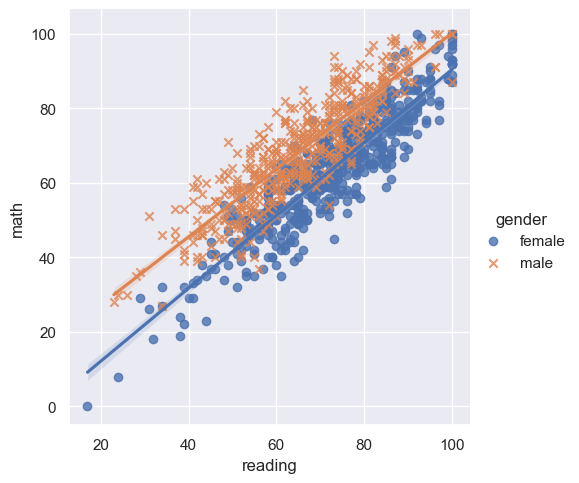

<Figure size 1200x500 with 0 Axes>

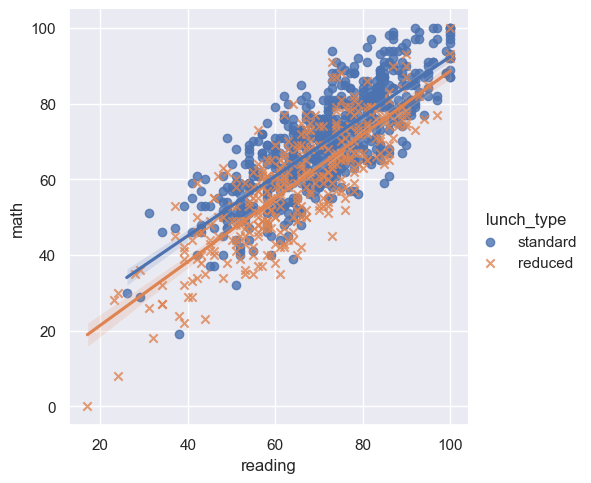

<Figure size 1200x500 with 0 Axes>

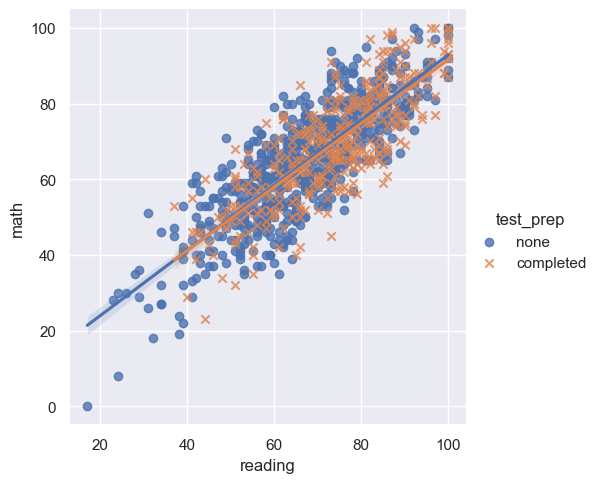

In [136]:
hue_list=['gender','lunch_type','test_prep']
for hue in hue_list:
    plt.figure(figsize=(12,5))
    sns.lmplot(x='reading',y='math',data=new_data,hue=hue,fit_reg=True,markers=['o','x'])

In [137]:
#creating a function to execute chisq test for independence
def chisq(col1,col2):
    #create a contingency table
    table=pd.crosstab(new_data[col1],new_data[col2])
    #get chi_Sq statistics,p-value,degrees of freedom and expected frequencies.
    stat, p, dof, expected = chi2_contingency(table)
    #set significance level
    alpha=0.05
    if p<=0.05:
        print('Features are associated')
    else:
        print('Features are not associated')
        
chisq('gender','lunch_type')
chisq('gender','parent_ed_level')
chisq('gender','race')
chisq('gender','test_prep')
chisq('lunch_type','test_prep')
chisq('lunch_type','parent_ed_level')
chisq('lunch_type','race')
chisq('parent_ed_level','race')
chisq('parent_ed_level','test_prep')
chisq('race','test_prep')

Features are not associated
Features are not associated
Features are not associated
Features are not associated
Features are not associated
Features are not associated
Features are not associated
Features are not associated
Features are not associated
Features are not associated


In [138]:
new_data.drop(['test_prep'],axis=1,inplace=True)
new_data.head()

,gender,race,parent_ed_level,lunch_type,math,reading
0,female,group B,bachelor's degree,standard,72,72
1,female,group C,some college,standard,69,90
2,female,group B,master's degree,standard,90,95
3,male,group A,associate's degree,reduced,47,57
4,male,group C,some college,standard,76,78


In [139]:
label=LabelEncoder()
cat_list=['gender','race','lunch_type','parent_ed_level']
for col in cat_list:
    new_data[col]=label.fit_transform(new_data[col])
new_data['race'].value_counts()

2    319
3    262
1    190
4    140
0     89
Name: race, dtype: int64

<Axes: >

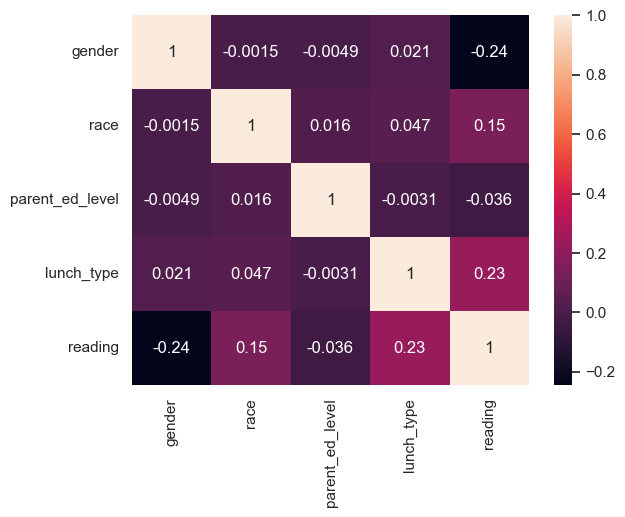

In [140]:
y=new_data['math']
new_data.drop(['math'],axis=1,inplace=True)
new_data['reading']=new_data['reading']/100.0
y=y/100.0
corr_matrix=new_data.corr()
sns.heatmap(corr_matrix,annot=True)

In [141]:
#creating a function that prints all relevant regression metrics when called
def reg_metrics(actual,predicted):
    mae = metrics.mean_absolute_error(actual,predicted)
    mse = metrics.mean_squared_error(actual,predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual,predicted))
    r2 = r2_score(actual,predicted)
    print("MAE:",mae)
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("R2:",r2)


In [142]:
#creating a function to plot a histogram of the residual values.
def residual_plot(actual,predicted):
    plt.figure(figsize=(10,6))
    plt.xlabel('Residual error value')
    plt.title('Residual Plot',size=13)
    plt.hist(actual-predicted)
#plotting the residual error plot

LINEAR REGRESSION

In [143]:
#training algorithm with the dataset containing outliers
X_train, X_holdout, y_train, y_holdout = train_test_split(new_data.values,y,test_size=0.3,random_state=17)
reg=LinearRegression()
reg.fit(X_train,y_train)
pred=reg.predict(X_holdout)

In [144]:
coef_df = pd.DataFrame(reg.coef_, new_data.columns, columns=['coefficients'])
coef_df

,coefficients
gender,0.114165
race,0.010506
parent_ed_level,0.001231
lunch_type,0.042006
reading,0.882106


In [145]:
intercept=reg.intercept_
intercept

-0.05805471158456532

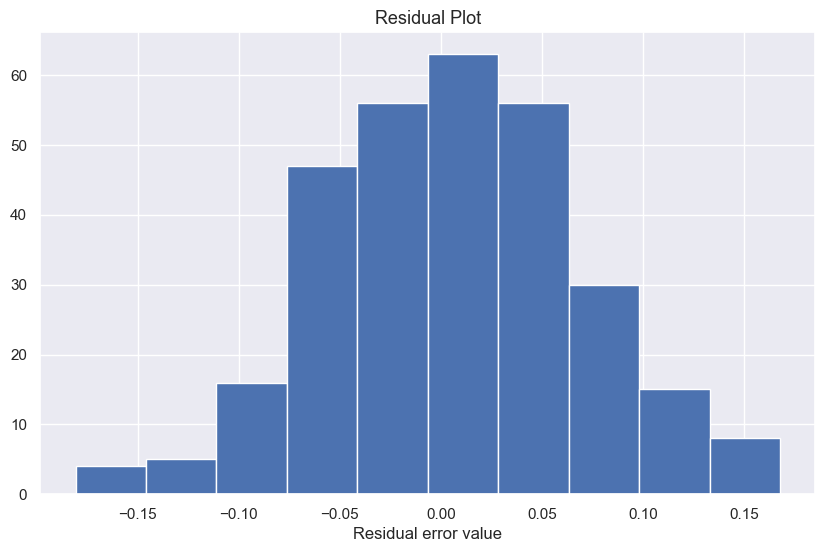

In [146]:
residual_plot(y_holdout,pred)

<Axes: xlabel='predicted', ylabel='actual'>

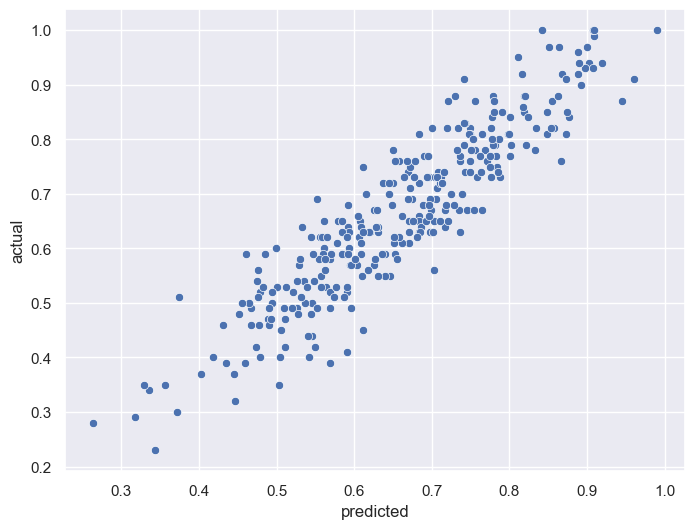

In [147]:
plt.figure(figsize=(8,6))
plt.xlabel('predicted')
plt.ylabel('actual')
sns.scatterplot(x=pred,y=y_holdout)

In [148]:
reg_metrics(y_holdout,pred)

MAE: 0.05105437080635658
MSE: 0.004043699097831916
RMSE: 0.06359008647448056
R2: 0.8336765595537284


In [149]:
#RIDGE REGRESSION
from sklearn.model_selection import RepeatedKFold
ridge=Ridge()
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid=dict()
grid['alpha']=np.arange(0.0,1.0,0.01)
search=GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,refit=False)
result=search.fit(X_train,y_train)
print('MAE: %.3f' % result.best_score_)
print('Config: %s' % result.best_params_)

MAE: -0.048
Config: {'alpha': 0.04}


In [150]:
ridge=Ridge(alpha=0.04)
ridge.fit(X_train,y_train)
pred1=ridge.predict(X_holdout)
reg_metrics(y_holdout,pred1)

MAE: 0.051093921296296446
MSE: 0.004049491584354411
RMSE: 0.06363561569085673
R2: 0.8334383058499164


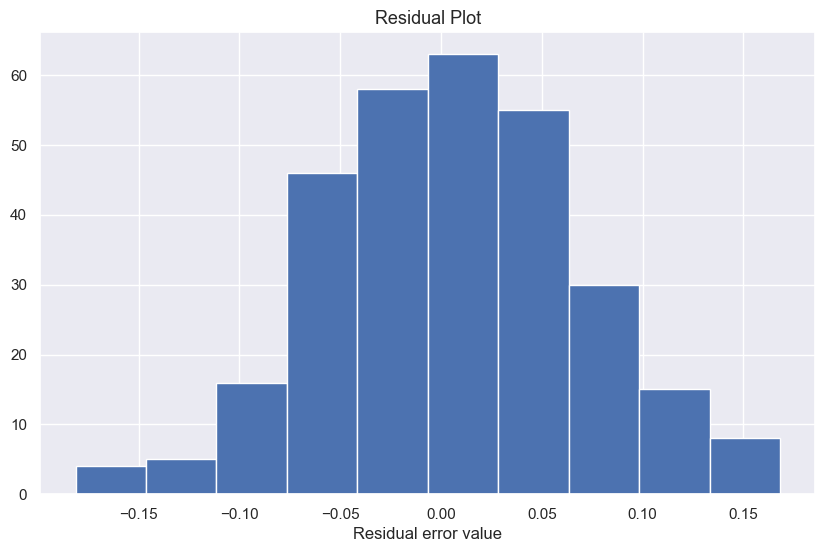

In [151]:
residual_plot(y_holdout,pred1)

In [152]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid=dict()
grid['alpha']=np.arange(0.0,2.0,0.01)
search=GridSearchCV(lasso,grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1,refit=False)
result=search.fit(X_train,y_train)
print('MAE: %.3f' % result.best_score_)
print('Config: %s' % result.best_params_)

MAE: -0.060
Config: {'alpha': 0.0}


In [153]:
lasso=Lasso(alpha=0)
lasso.fit(X_train,y_train)
pred2=lasso.predict(X_holdout)
reg_metrics(y_holdout,pred2)

MAE: 0.05105437080635655
MSE: 0.00404369909783191
RMSE: 0.06359008647448051
R2: 0.8336765595537287


C:\Users\HP\AppData\Local\Temp\ipykernel_6372\2802293395.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,y_train)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+00, tolerance: 1.567e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

RANDOM FOREST REGRESSOR

In [154]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)
pred3=forest.predict(X_holdout)
reg_metrics(y_holdout,pred3)

MAE: 0.057701350396825384
MSE: 0.005207794704384588
RMSE: 0.07216505182139474
R2: 0.7857955521874682


In [155]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,4,5],
    'max_features': [3,4,5],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [8,10],
    'n_estimators': [100, 200]
}
forest_cv=RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=42)
# Instantiate the grid search model
grid=GridSearchCV(estimator=forest_cv, param_grid=param_grid, cv=6, n_jobs=-1, verbose=2)

In [156]:
grid.fit(X_train,y_train)


Fitting 6 folds for each of 108 candidates, totalling 648 fits


GridSearchCV(cv=6,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [3, 4, 5],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [157]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [158]:
forest_cv=RandomForestRegressor(criterion='absolute_error',bootstrap=True,max_depth=5,max_features=4,min_samples_leaf=3,min_samples_split=10,n_estimators=100)
forest_cv.fit(X_train,y_train)
pred4=forest_cv.predict(X_holdout)

In [159]:
reg_metrics(y_holdout,pred4)


MAE: 0.05358366666666666
MSE: 0.004440904983333334
RMSE: 0.06664011542106851
R2: 0.817338882628775


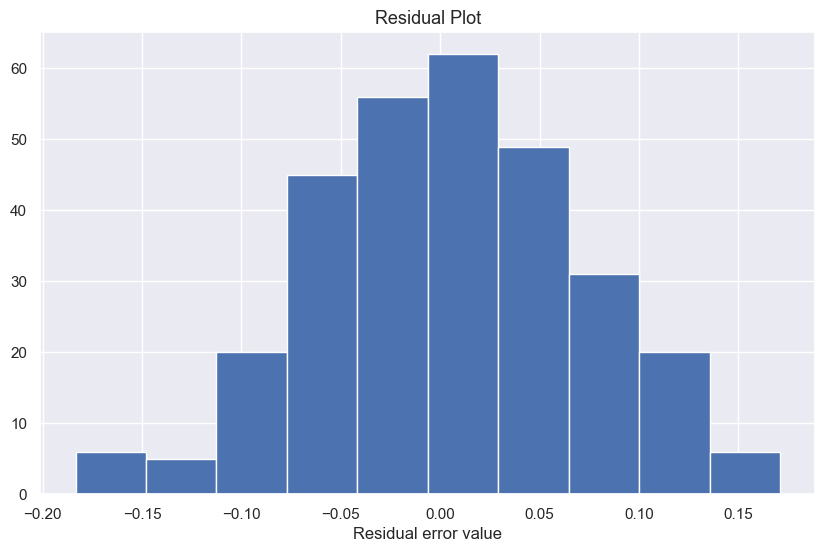

In [160]:
residual_plot(y_holdout,pred4)